# PHYS410. Project 3.
## Anuar Yeraliyev, 47382130

We consider a driven damped pendulum motion specified by the differential equation:
$$ m \frac{d^2\theta}{dt^2} + \nu \frac{d\theta}{dt} + mgsin(\theta) = Asin(wt) $$

The differential equation is solved by first splitting it into two first-order equations and then solving it with Runge-Kutta4 method that uses 4 points to compute the next.
We assumed the variable m, g and l to be 1.
Wraptopi() function makes sure the angle is always in the range of -pi and pi.

In [458]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [638]:
# Explicit 4-Order Runge-Kutta with constant step size
# Outputs vector y = [theta, velocity] and t and poincare points
def RK4(func, t_span, y0, h, A):
    #h = 0.01
    t0 = t_span[0]
    tf = t_span[1]
    
    
    iters = int(round((tf - t0)/ h))
    y = np.zeros((iters + 1, np.size(y0)))
        
    flag = True
    poincare_theta = []
    poincare_vel = []
    #poinc_ts = []
    y[0, :] = y0
    for i in range(iters):
        k1 = func(t0 + (i)*h, y[i, :], A)
        k2 = func(t0 + (i)*h + h/2.0, y[i, :] + (h/2.0)*k1, A)
        k3 = func(t0 + (i)*h + h/2.0, y[i, :] + (h/2.0)*k2, A)
        k4 = func(t0 + (i)*h + h,     y[i, :] + h*k3, A)
        y[i+1, :] = y[i, :] + h/6.0 * (k1 + 2*k2 + 2*k3 + k4)
        
        if flag:
            if np.abs((w * (t0 + i*h)) % (2 * np.pi)) < 0.001:
                poincare_theta.append(y[i, 0])
                poincare_vel.append(y[i, 1])                
        
    t = t0 + h*np.arange(iters + 1).T
    return y, t, poincare_theta, poincare_vel

In [639]:
m = 1.0
g = 1.0
l = 1.0
w = 2./3.

def propagate(t_final, A, h, mu):
    
    t_span = np.array([0, t_final])
    y0 = np.array([0.2, 0])
    def func(t, y, A):
        arr = np.array([y[1], A*np.sin(w * t) - (mu/m) * y[1] - g*np.sin(y[0])])
        return arr
    
    ys, t, poinc1, poinc2 = RK4(func, t_span, y0, h, A)
    return ys, t, poinc1, poinc2
    
def wraptopi(x):
        pi = np.pi
        return x - 2*pi * np.floor(x / (2*pi) + 0.5);  

## Part 1. Unforced motion
We compute unforced ($A = 0$) motion for different values of $\nu = 1, 5, 10$. 
The obtained graphs correspond to under-damped, critically damped and over-damped motions respectively.

$\nu$ acts as a damping factor.

In all three cases the pendulum reaches the steady state of equilibrium (stationary) after $t=50$.

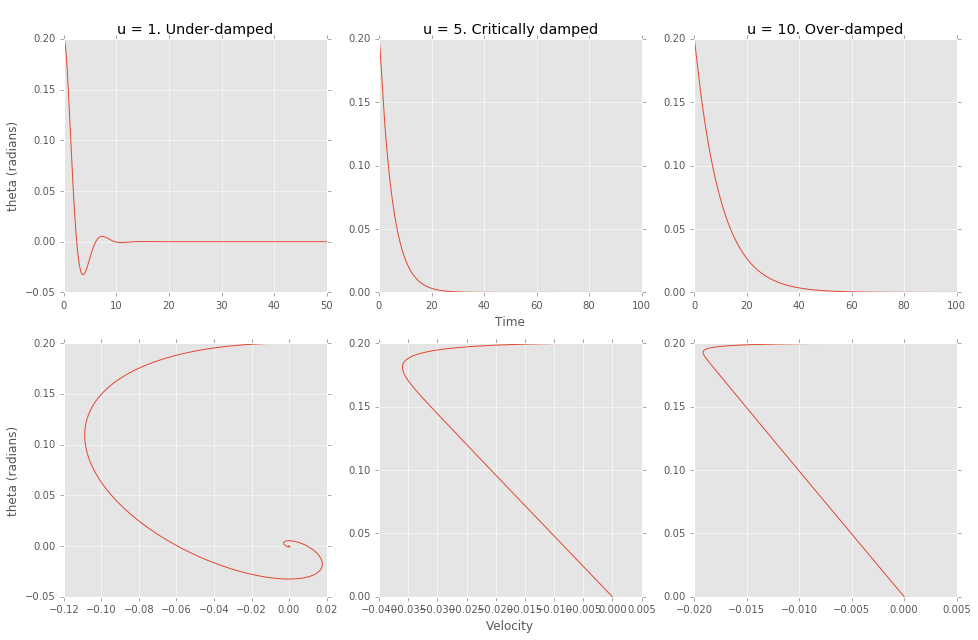

In [570]:
fig, axs = plt.subplots(2, 3, figsize=(15, 9))
ys, ts, poinc_theta, poinc_vel = propagate(50, 0, 0.001, 1)
axs[0, 0].plot(ts, ys[:, 0])
axs[1, 0].plot(ys[:, 1], ys[:, 0])
ys, ts, poinc_theta, poinc_vel = propagate(100, 0, 0.001, 5)
axs[0, 1].plot(ts, ys[:, 0])
axs[1, 1].plot(ys[:, 1], ys[:, 0])
ys, ts, poinc_theta, poinc_vel = propagate(100, 0, 0.001, 10)
axs[0, 2].plot(ts, ys[:, 0])
axs[1, 2].plot(ys[:, 1], ys[:, 0])
axs[0, 0].set_title("\nu = 1. Under-damped")
axs[0, 1].set_title("\nu = 5. Critically damped")
axs[0, 2].set_title("\nu = 10. Over-damped")
axs[0, 1].set_xlabel('Time')
axs[0, 0].set_ylabel('theta (radians)')
axs[1, 0].set_ylabel('theta (radians)')
axs[1, 1].set_xlabel('Velocity')

## Part 2. Forced motion
We introduce an external driving force on the system by varying $A$ factor.

At $A=0.5$, the system is stable and is mostly driven by the sinusoidal external force. However, at $A=1.2$ the pendulum becomes unstable, it overflows the periodic edges (i.e. $-\pi$ and $\pi$) and produces a random chaotic phase space diagram. No steady state is achieved for $A=1.2$.

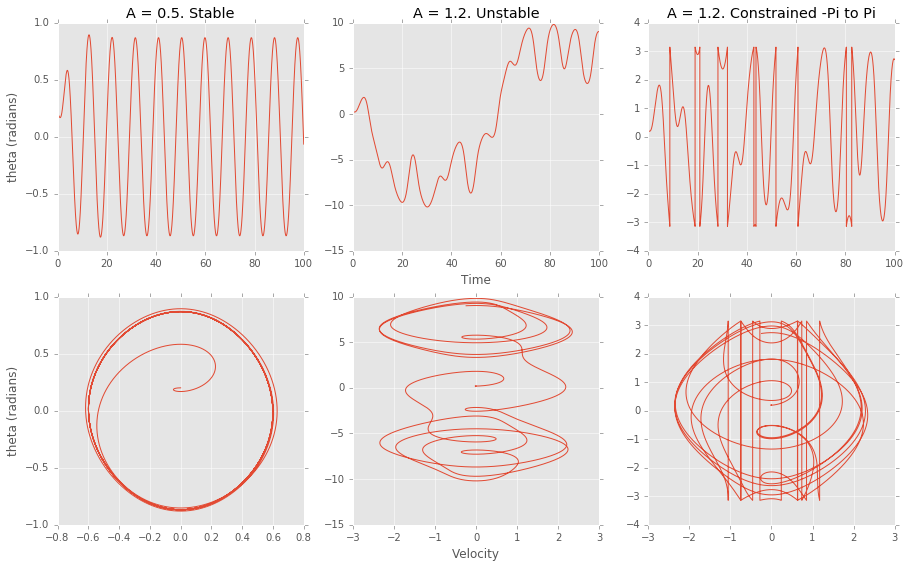

In [608]:
fig, axs = plt.subplots(2, 3, figsize=(15, 9))
ys, ts, poinc_theta, poinc_vel = propagate(100, 0.5, 0.001, 0.5)
axs[0, 0].plot(ts, ys[:, 0])
axs[1, 0].plot(ys[:, 1], ys[:, 0])
ys, ts, poinc_theta, poinc_vel = propagate(100, 1.2, 0.001, 0.5)
axs[0, 1].plot(ts, ys[:, 0])
axs[1, 1].plot(ys[:, 1], ys[:, 0])
ys, ts, poinc_theta, poinc_vel = propagate(100, 1.2, 0.001, 0.5)
ys[:, 0] = wraptopi(ys[:, 0]) 
axs[0, 2].plot(ts, ys[:, 0])
axs[1, 2].plot(ys[:, 1], ys[:, 0])
axs[0, 0].set_title("A = 0.5. Stable")
axs[0, 1].set_title("A = 1.2. Unstable")
axs[0, 2].set_title("A = 1.2. Constrained -Pi to Pi")
axs[0, 1].set_xlabel('Time')
axs[0, 0].set_ylabel('theta (radians)')
axs[1, 0].set_ylabel('theta (radians)')
axs[1, 1].set_xlabel('Velocity')

## Part 3. 
In the case when $A=1.35$ we obtain a more periodic and stable solution in comparison to others. There is more variability within a period in $A=1.465$ than in others. However, they all produce a stable manifold.

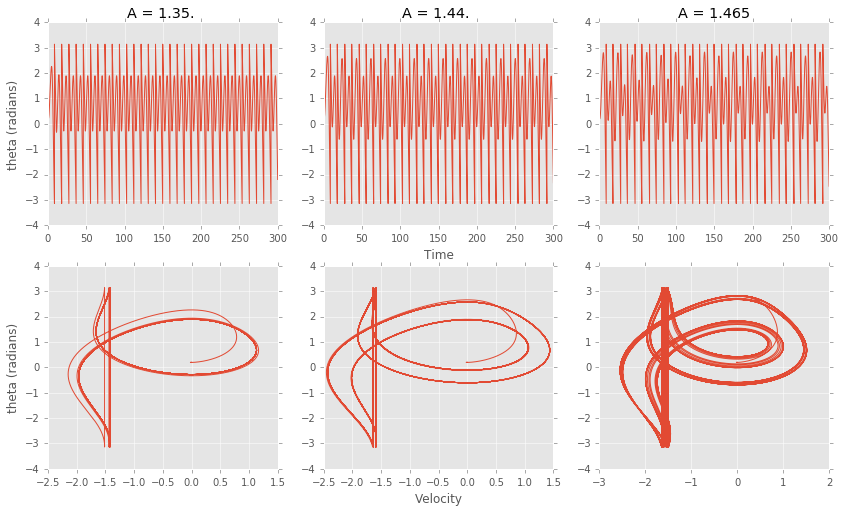

In [620]:
fig, axs = plt.subplots(2, 3, figsize=(15, 9))
ys, ts, poinc_theta, poinc_vel = propagate(300, 1.35, 0.001, 0.5)
ys[:, 0] = wraptopi(ys[:, 0]) 
axs[0, 0].plot(ts, ys[:, 0])
axs[1, 0].plot(ys[:, 1], ys[:, 0])
ys, ts, poinc_theta, poinc_vel = propagate(300, 1.44, 0.001, 0.5)
ys[:, 0] = wraptopi(ys[:, 0]) 
axs[0, 1].plot(ts, ys[:, 0])
axs[1, 1].plot(ys[:, 1], ys[:, 0])
ys, ts, poinc_theta, poinc_vel = propagate(300, 1.465, 0.001, 0.5)
ys[:, 0] = wraptopi(ys[:, 0]) 
axs[0, 2].plot(ts, ys[:, 0])
axs[1, 2].plot(ys[:, 1], ys[:, 0])
axs[0, 0].set_title("A = 1.35. ")
axs[0, 1].set_title("A = 1.44. ")
axs[0, 2].set_title("A = 1.465")
axs[0, 1].set_xlabel('Time')
axs[0, 0].set_ylabel('theta (radians)')
axs[1, 0].set_ylabel('theta (radians)')
axs[1, 1].set_xlabel('Velocity')

Now we selected specific Poincare points when $wt = 2n\pi$. 

The resulting behaviour of all three systems is stable, nevertheless, a larger driving force leads to a larger variability in the steady state, e.g. in case of A=1.465 the phase space can occupy more values of theta and velocity.

The case of A=1.35 suddenly drops to its steady state which makes us think that it's critically damped.

Cases of A=1.44 and A=1.465 keep oscillating around its equilibrium point of around 1.6 radians. Generally, they all damp suddenly and quickly to its equilibrium point which makes us belive that they are either critically damped or over-damped.

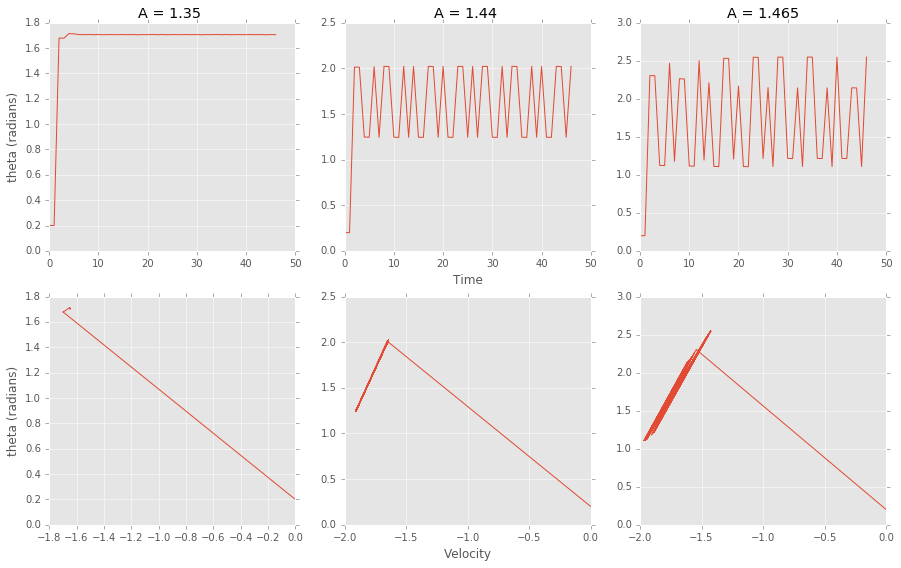

In [642]:
fig, axs = plt.subplots(2, 3, figsize=(15, 9))
ys, ts, poinc_theta, poinc_vel = propagate(300, 1.35, 0.001, 0.5)
poinc_theta = wraptopi(np.array(poinc_theta)) 
axs[0, 0].plot(poinc_theta)
axs[1, 0].plot(poinc_vel, poinc_theta)
ys, ts, poinc_theta, poinc_vel = propagate(300, 1.44, 0.001, 0.5)
poinc_theta = wraptopi(np.array(poinc_theta)) 
axs[0, 1].plot(poinc_theta)
axs[1, 1].plot(poinc_vel, poinc_theta)
ys, ts, poinc_theta, poinc_vel = propagate(300, 1.465, 0.001, 0.5)
poinc_theta = wraptopi(np.array(poinc_theta))
axs[0, 2].plot(poinc_theta)
axs[1, 2].plot(poinc_vel, poinc_theta)
axs[0, 0].set_title("A = 1.35 ")
axs[0, 1].set_title("A = 1.44 ")
axs[0, 2].set_title("A = 1.465")
axs[0, 1].set_xlabel('Time')
axs[0, 0].set_ylabel('theta (radians)')
axs[1, 0].set_ylabel('theta (radians)')
axs[1, 1].set_xlabel('Velocity')